# OpenAI Gym RL Environment Demo - Frozen Lake

Frozen Lake involves a player navigating a grid world with the goal of reaching the goal state (G) from the start state (S) while avoiding holes/obstacles (H) that come along the way. 

The player can move in four directions: up, down, left, and right. 
The player receives a reward of 1 for reaching the goal state and a reward of 0 otherwise.

### Reinforcement Learning

A type of machine learning where an agent learns to make decisions by interacting with an environment. The agent receives rewards for performing actions and aims to maximize the total reward over time.

### RL Terms

- **Agent** → The decision maker that interacts with the environment
- **Environment** → The space or system the agent operates in and responds to said agent’s actions
- **State** → A representation of the environment’s current situation
- **Action** → Choices the agent can make that affect the environment
- **Reward** → A numerical value received after each action, indicating the desirability of the outcome

### Frozen Lake Example
- **Agent** → Represents the player who is navigating the grid world
- **Environment** → The 4x4 grid world
- **State** → The player’s current position on the grid (Agent can be in 1 of the 16 positions or "squares" on the 4x4 grid)
- **Action** → The player’s movement/direction in the grid (4 different actions per state -> up, down, left, right)
- **Reward** → 1 for reaching the goal state (present), 0 otherwise

In [176]:
import gymnasium as gym
import matplotlib.pyplot as plt

In [177]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array", is_slippery=True)

# is_slippery -> agent might slip and move in an unintended direction than what was expected

### Observation Space
The different states the agent can be in (16 possible states (4x4 grid, where agent is on one of the 16 squares)

### Action Space
The different actions the agent can take (Agent can do 4 possible actions: up, down, left, right)

In [178]:
obs_space = env.observation_space
action_space = env.action_space

print(f"Observation Space: {obs_space}")
print(f"Action Space: {action_space}")

Observation Space: Discrete(16)
Action Space: Discrete(4)


In [179]:
# Reset the environment
obs = env.reset()

# The initial observation represents the starting state of the agent in the environment
print(f"Initial Observation: {obs[0]}")

# Agent completes a random action within the environment
random_action = env.action_space.sample()

# Get the updated observation space after the agent completes said random action
new_obs, reward, done, truncated, info = env.step(random_action)
print(f"New Observation: {new_obs}")

Initial Observation: 0
New Observation: 0


Show the aftermath of the agent completing a random action within the environment

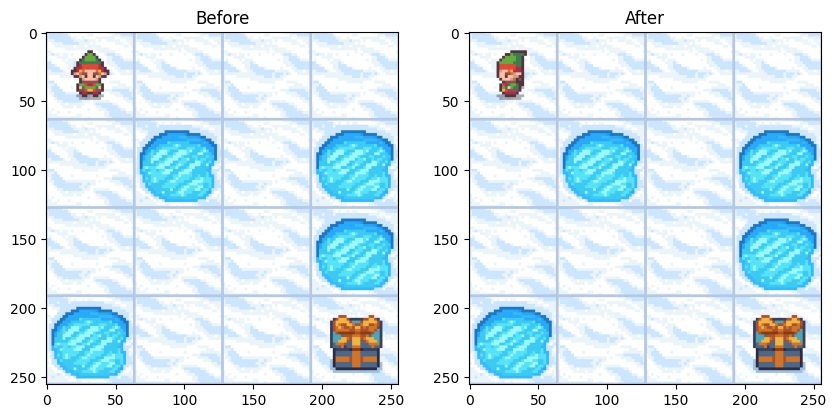

In [180]:
obs = env.reset()

# Render the screen before and after the agent completes a random action
env_screen_before = env.render()
random_action = env.action_space.sample()
new_obs, reward, done, truncated, info = env.step(random_action)
env_screen_after = env.render()

# Close the environment
env.close()

# Display the before and aftermath of agent completing a random action
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(env_screen_before)
plt.title('Before')

plt.subplot(1, 2, 2)
plt.imshow(env_screen_after)
plt.title('After')

plt.show()

Run the agent in the environment for a specified number of steps (150), rather than just once

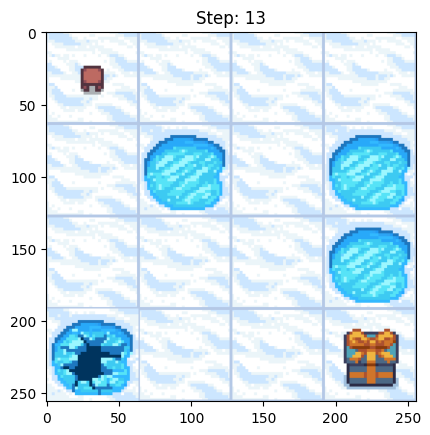

(0, {'prob': 1})

In [184]:
import time
from IPython.display import clear_output
import IPython.display as display

# Number of steps to run the agent for
num_steps = 150

# Reset the environment and get the initial observation
obs = env.reset()

for step in range(num_steps):
    # Agent completes a random action within the environment
    action = env.action_space.sample()

    # Apply the random action and get new observation
    obs, reward, done, truncated, info = env.step(action)

    clear_output(wait=True)

    # Create a new figure and plot the observation
    if(step % 1 == 0):
        print(f"Observation at step {step}: {obs}")
        env_screen = env.render()
        plt.imshow(env_screen)
        plt.title(f'Step: {step}')
        plt.show()

    time.sleep(0.1)

    # Check if episode is over, and end simulation if so
    if done:
        break

# Reset the environment
env.reset()